# Задание по дисциплине «Информационная безопасность и кодирование»
## Лабораторная работа №1 «Принцип кодирования по Хаффману»

ФИО:   Cавенко Екатерина Игоревна

Группа: БИВТ-21-4

### Импорт библиотек


In [223]:
import pandas as pd
from heapq import heappush, heappop
import networkx as nx
import matplotlib.pyplot as plt
from math import ceil

### 1. Исходные данные

In [194]:
origin_string = 'САВЕНКО ЕКАТЕРИНА ИГОРЕВНА, 14 АВГУСТА 2003 ГОДА, ГОРОД МОСКВА'

#### Функция для форматирования чисел


In [195]:
def format_freq(freq):
    return f"{freq:.4f}".replace('.', ',')

#### Посчитаем повторы каждого символа

In [196]:
freq_dict = {}
for char in origin_string:
    char = 'ПРОБЕЛ' if char == ' ' else 'ЗАПЯТАЯ' if char == ',' else char
    freq_dict[char] = freq_dict.get(char, 0) + 1

df_repetition = pd.DataFrame.from_dict(freq_dict, orient='index', columns=['Повтор'])
df_repetition.index.name = 'Символ'
df_repetition.reset_index(inplace=True)

df_repetition.to_csv('char_repetition.csv', sep=';', index=False, encoding='utf-8-sig')
print("Сохранен файл char_repetition.csv с количеством повторений символов")

print("\nТаблица повторений:")
display(df_repetition)

Сохранен файл char_repetition.csv с количеством повторений символов

Таблица повторений:


,Символ,Повтор
0,С,3
1,А,8
2,В,4
3,Е,4
4,Н,3
5,К,3
6,О,6
7,ПРОБЕЛ,8
8,Т,2
9,Р,3


#### Посчитаем частоты каждого символа

In [197]:
lenght_str = sum(freq_dict.values())
data = []
for char, count in freq_dict.items():
    freq = count / lenght_str
    data.append([char, count, format_freq(freq)])

df_frequencies = pd.DataFrame(data, columns=["Символ", "Повтор", "Частота"])
df_frequencies = df_frequencies.sort_values(by="Частота", ascending=False).reset_index(drop=True)
df_frequencies.index = range(1, len(df_frequencies)+1)

df_frequencies.to_csv('char_frequencies.csv', sep=';', index=True, index_label='№', encoding='utf-8-sig')
print("Сохранен файл char_frequencies.csv с частотами символов")

print("\nТаблица частот:")
display(df_frequencies)

Сохранен файл char_frequencies.csv с частотами символов

Таблица частот:


,Символ,Повтор,Частота
1,ПРОБЕЛ,8,"0,1290"
2,А,8,"0,1290"
3,О,6,"0,0968"
4,В,4,"0,0645"
5,Е,4,"0,0645"
6,Г,4,"0,0645"
7,С,3,"0,0484"
8,Н,3,"0,0484"
9,К,3,"0,0484"
10,Р,3,"0,0484"


### 2. Кодирование по Хаффману


#### Промежуточные шаги

In [198]:
# Инициализация CSV файла с сохранением индексов
output_file = "huffman_process.csv"
with open(output_file, 'w', encoding='utf-8') as f:
    f.write("Шаг 1: Исходная таблица частот\n")
    df_frequencies.to_csv(f, sep=';', index=True, index_label="Индекс", )  # Записываем с индексами
    f.write("\n")

df_haffman = df_frequencies.copy()

step = 1
while len(df_haffman) > 2:
    step += 1
    # Сортируем по частоте (от меньшей к большей)
    df_haffman = df_haffman.sort_values(by="Частота")
    
    # Берем две строки с наименьшими частотами
    rows_to_combine = df_haffman.iloc[:2]
    
    # Создаем новую объединенную строку
    new_row = pd.DataFrame({
        'Символ': [', '.join(rows_to_combine['Символ'])],
        'Повтор': [', '.join(map(str, rows_to_combine['Повтор']))],
        'Частота': [rows_to_combine['Частота'].sum()]
    }, index=[f"{rows_to_combine.index[-2]}, {rows_to_combine.index[-1]}"])
    
    # Удаляем две объединенные строки и добавляем новую
    df_haffman = pd.concat([df_haffman.iloc[2:], new_row])
    
    # Записываем текущее состояние в CSV
    with open(output_file, 'a', encoding='utf-8') as f:
        f.write(f"\nШаг {step}: Объединены {rows_to_combine.iloc[0]['Символ']} и {rows_to_combine.iloc[1]['Символ']}\n")
        df_haffman.to_csv(f, sep=';', index=True, index_label="Индекс")
        f.write("\n")
    
    # display(df_haffman.sort_values(by="Частота", ascending=False))
    # print(f"\nШаг {step}: Объединены символы {rows_to_combine.iloc[0]['Символ']} и {rows_to_combine.iloc[1]['Символ']}")

df_haffman = df_haffman.sort_values(by="Частота", ascending=False)

# Финальная запись
df_haffman = df_haffman.sort_values(by="Частота", ascending=False)
with open(output_file, 'a', encoding='utf-8') as f:
    f.write("\nИтоговая таблица для построения кодов Хаффмана:\n")
    df_haffman.to_csv(f, sep=';', index=True, index_label="Индекс")

print("\nИтоговая таблица для построения кодов Хаффмана:")
display(df_haffman)

print(f"\nВсе шаги записаны в файл: {output_file}")


Итоговая таблица для построения кодов Хаффмана:


,Символ,Повтор,Частота
1,ПРОБЕЛ,8,"0,1290"
"21, 19, 18, 17, 16, 20, 13, 12, 11, 15, 14, 8, 9, 10, 7, 6, 5, 4, 3, 2","М, 2, У, 4, 1, 3, И, Д, 0, Т, ЗАПЯТАЯ, Н, К, Р...","1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 4...","0,01610,01610,01610,01610,01610,01610,03230,03..."



Все шаги записаны в файл: huffman_process.csv


#### Класс кучи с форматированными частотами

In [199]:

class HuffmanNode:
    def __init__(self, symbol=None, freq=0, left=None, right=None):
        self.symbol = symbol
        self.freq = freq
        self.freq_str = format_freq(freq)
        self.left = left
        self.right = right
        self.name = symbol if symbol else ""
        if left and right:
            self.name = left.name + ', ' + right.name
    
    def __lt__(self, other):
        return self.freq < other.freq
    
    def __repr__(self):
        return f"{self.name}:{self.freq_str}"

#### Функция для вывода шагов алгоритма в виде таблицы

In [200]:
def print_heap_table(heap, step):
    heap_data = []
    for node in heap:
        if node.symbol:
            display_name = node.symbol
        else:
            display_name = node.name
        
        
        
        heap_data.append({
            "Узел": display_name,
            "Частота": node.freq_str,
        })
    
    df_heap = pd.DataFrame(heap_data)
    print(f"\nШаг {step}: Состояние кучи")
    display(df_heap)


#### Построение дерева с форматированным выводом

In [201]:
heap = []
for char, count in freq_dict.items():
    freq = count / lenght_str
    heappush(heap, HuffmanNode(symbol=char, freq=freq))

print_heap_table(heap, "Инициализация")

step = 1
while len(heap) > 1:
    left = heappop(heap)
    right = heappop(heap)
    merged_freq = left.freq + right.freq
    merged = HuffmanNode(freq=merged_freq, left=left, right=right)
    heappush(heap, merged)
    
    print(f"\nОбъединение {step}: {left.name} ({left.freq_str}) + {right.name} ({right.freq_str}) = {merged.name} ({merged.freq_str})")
    print_heap_table(heap, step)
    step += 1

huffman_tree = heap[0]


Шаг Инициализация: Состояние кучи


,Узел,Частота
0,1,"0,0161"
1,У,"0,0161"
2,4,"0,0161"
3,2,"0,0161"
4,М,"0,0161"
5,К,"0,0484"
6,Т,"0,0323"
7,И,"0,0323"
8,3,"0,0161"
9,Д,"0,0323"



Объединение 1: 1 (0,0161) + 4 (0,0161) = 1, 4 (0,0323)

Шаг 1: Состояние кучи


,Узел,Частота
0,У,"0,0161"
1,М,"0,0161"
2,Т,"0,0323"
3,2,"0,0161"
4,Д,"0,0323"
5,К,"0,0484"
6,ЗАПЯТАЯ,"0,0323"
7,И,"0,0323"
8,3,"0,0161"
9,"1, 4","0,0323"



Объединение 2: У (0,0161) + М (0,0161) = У, М (0,0323)

Шаг 2: Состояние кучи


,Узел,Частота
0,2,"0,0161"
1,3,"0,0161"
2,Т,"0,0323"
3,0,"0,0323"
4,Д,"0,0323"
5,К,"0,0484"
6,ЗАПЯТАЯ,"0,0323"
7,И,"0,0323"
8,"У, М","0,0323"
9,"1, 4","0,0323"



Объединение 3: 2 (0,0161) + 3 (0,0161) = 2, 3 (0,0323)

Шаг 3: Состояние кучи


,Узел,Частота
0,Т,"0,0323"
1,Д,"0,0323"
2,ЗАПЯТАЯ,"0,0323"
3,0,"0,0323"
4,"1, 4","0,0323"
5,К,"0,0484"
6,С,"0,0484"
7,И,"0,0323"
8,"У, М","0,0323"
9,Е,"0,0645"



Объединение 4: Т (0,0323) + ЗАПЯТАЯ (0,0323) = Т, ЗАПЯТАЯ (0,0645)

Шаг 4: Состояние кучи


,Узел,Частота
0,"2, 3","0,0323"
1,Д,"0,0323"
2,С,"0,0484"
3,0,"0,0323"
4,"1, 4","0,0323"
5,К,"0,0484"
6,Н,"0,0484"
7,И,"0,0323"
8,"У, М","0,0323"
9,Е,"0,0645"



Объединение 5: 2, 3 (0,0323) + Д (0,0323) = 2, 3, Д (0,0645)

Шаг 5: Состояние кучи


,Узел,Частота
0,"1, 4","0,0323"
1,0,"0,0323"
2,С,"0,0484"
3,"У, М","0,0323"
4,Р,"0,0484"
5,К,"0,0484"
6,Н,"0,0484"
7,И,"0,0323"
8,ПРОБЕЛ,"0,1290"
9,Е,"0,0645"



Объединение 6: 1, 4 (0,0323) + 0 (0,0323) = 1, 4, 0 (0,0645)

Шаг 6: Состояние кучи


,Узел,Частота
0,"У, М","0,0323"
1,И,"0,0323"
2,С,"0,0484"
3,"2, 3, Д","0,0645"
4,Р,"0,0484"
5,К,"0,0484"
6,Н,"0,0484"
7,А,"0,1290"
8,ПРОБЕЛ,"0,1290"
9,Е,"0,0645"



Объединение 7: У, М (0,0323) + И (0,0323) = У, М, И (0,0645)

Шаг 7: Состояние кучи


,Узел,Частота
0,С,"0,0484"
1,Р,"0,0484"
2,Н,"0,0484"
3,"2, 3, Д","0,0645"
4,"Т, ЗАПЯТАЯ","0,0645"
5,К,"0,0484"
6,"У, М, И","0,0645"
7,А,"0,1290"
8,ПРОБЕЛ,"0,1290"
9,Е,"0,0645"



Объединение 8: С (0,0484) + Н (0,0484) = С, Н (0,0968)

Шаг 8: Состояние кучи


,Узел,Частота
0,К,"0,0484"
1,Р,"0,0484"
2,"У, М, И","0,0645"
3,"2, 3, Д","0,0645"
4,"Т, ЗАПЯТАЯ","0,0645"
5,В,"0,0645"
6,О,"0,0968"
7,А,"0,1290"
8,ПРОБЕЛ,"0,1290"
9,Е,"0,0645"



Объединение 9: К (0,0484) + Р (0,0484) = К, Р (0,0968)

Шаг 9: Состояние кучи


,Узел,Частота
0,"У, М, И","0,0645"
1,"Т, ЗАПЯТАЯ","0,0645"
2,В,"0,0645"
3,"2, 3, Д","0,0645"
4,"1, 4, 0","0,0645"
5,Г,"0,0645"
6,О,"0,0968"
7,А,"0,1290"
8,ПРОБЕЛ,"0,1290"
9,Е,"0,0645"



Объединение 10: У, М, И (0,0645) + В (0,0645) = У, М, И, В (0,1290)

Шаг 10: Состояние кучи


,Узел,Частота
0,Г,"0,0645"
1,"Т, ЗАПЯТАЯ","0,0645"
2,О,"0,0968"
3,"2, 3, Д","0,0645"
4,"1, 4, 0","0,0645"
5,"К, Р","0,0968"
6,"С, Н","0,0968"
7,А,"0,1290"
8,ПРОБЕЛ,"0,1290"
9,Е,"0,0645"



Объединение 11: Г (0,0645) + Т, ЗАПЯТАЯ (0,0645) = Г, Т, ЗАПЯТАЯ (0,1290)

Шаг 11: Состояние кучи


,Узел,Частота
0,"1, 4, 0","0,0645"
1,Е,"0,0645"
2,О,"0,0968"
3,"2, 3, Д","0,0645"
4,"У, М, И, В","0,1290"
5,"К, Р","0,0968"
6,"С, Н","0,0968"
7,А,"0,1290"
8,ПРОБЕЛ,"0,1290"
9,"Г, Т, ЗАПЯТАЯ","0,1290"



Объединение 12: 1, 4, 0 (0,0645) + Е (0,0645) = 1, 4, 0, Е (0,1290)

Шаг 12: Состояние кучи


,Узел,Частота
0,"2, 3, Д","0,0645"
1,"У, М, И, В","0,1290"
2,О,"0,0968"
3,ПРОБЕЛ,"0,1290"
4,"Г, Т, ЗАПЯТАЯ","0,1290"
5,"К, Р","0,0968"
6,"С, Н","0,0968"
7,А,"0,1290"
8,"1, 4, 0, Е","0,1290"



Объединение 13: 2, 3, Д (0,0645) + О (0,0968) = 2, 3, Д, О (0,1613)

Шаг 13: Состояние кучи


,Узел,Частота
0,"С, Н","0,0968"
1,"У, М, И, В","0,1290"
2,"К, Р","0,0968"
3,ПРОБЕЛ,"0,1290"
4,"Г, Т, ЗАПЯТАЯ","0,1290"
5,А,"0,1290"
6,"1, 4, 0, Е","0,1290"
7,"2, 3, Д, О","0,1613"



Объединение 14: С, Н (0,0968) + К, Р (0,0968) = С, Н, К, Р (0,1935)

Шаг 14: Состояние кучи


,Узел,Частота
0,"1, 4, 0, Е","0,1290"
1,"У, М, И, В","0,1290"
2,А,"0,1290"
3,ПРОБЕЛ,"0,1290"
4,"Г, Т, ЗАПЯТАЯ","0,1290"
5,"2, 3, Д, О","0,1613"
6,"С, Н, К, Р","0,1935"



Объединение 15: 1, 4, 0, Е (0,1290) + А (0,1290) = 1, 4, 0, Е, А (0,2581)

Шаг 15: Состояние кучи


,Узел,Частота
0,"У, М, И, В","0,1290"
1,"Г, Т, ЗАПЯТАЯ","0,1290"
2,"2, 3, Д, О","0,1613"
3,ПРОБЕЛ,"0,1290"
4,"С, Н, К, Р","0,1935"
5,"1, 4, 0, Е, А","0,2581"



Объединение 16: У, М, И, В (0,1290) + Г, Т, ЗАПЯТАЯ (0,1290) = У, М, И, В, Г, Т, ЗАПЯТАЯ (0,2581)

Шаг 16: Состояние кучи


,Узел,Частота
0,ПРОБЕЛ,"0,1290"
1,"С, Н, К, Р","0,1935"
2,"2, 3, Д, О","0,1613"
3,"1, 4, 0, Е, А","0,2581"
4,"У, М, И, В, Г, Т, ЗАПЯТАЯ","0,2581"



Объединение 17: ПРОБЕЛ (0,1290) + 2, 3, Д, О (0,1613) = ПРОБЕЛ, 2, 3, Д, О (0,2903)

Шаг 17: Состояние кучи


,Узел,Частота
0,"С, Н, К, Р","0,1935"
1,"1, 4, 0, Е, А","0,2581"
2,"У, М, И, В, Г, Т, ЗАПЯТАЯ","0,2581"
3,"ПРОБЕЛ, 2, 3, Д, О","0,2903"



Объединение 18: С, Н, К, Р (0,1935) + У, М, И, В, Г, Т, ЗАПЯТАЯ (0,2581) = С, Н, К, Р, У, М, И, В, Г, Т, ЗАПЯТАЯ (0,4516)

Шаг 18: Состояние кучи


,Узел,Частота
0,"1, 4, 0, Е, А","0,2581"
1,"ПРОБЕЛ, 2, 3, Д, О","0,2903"
2,"С, Н, К, Р, У, М, И, В, Г, Т, ЗАПЯТАЯ","0,4516"



Объединение 19: 1, 4, 0, Е, А (0,2581) + ПРОБЕЛ, 2, 3, Д, О (0,2903) = 1, 4, 0, Е, А, ПРОБЕЛ, 2, 3, Д, О (0,5484)

Шаг 19: Состояние кучи


,Узел,Частота
0,"С, Н, К, Р, У, М, И, В, Г, Т, ЗАПЯТАЯ","0,4516"
1,"1, 4, 0, Е, А, ПРОБЕЛ, 2, 3, Д, О","0,5484"



Объединение 20: С, Н, К, Р, У, М, И, В, Г, Т, ЗАПЯТАЯ (0,4516) + 1, 4, 0, Е, А, ПРОБЕЛ, 2, 3, Д, О (0,5484) = С, Н, К, Р, У, М, И, В, Г, Т, ЗАПЯТАЯ, 1, 4, 0, Е, А, ПРОБЕЛ, 2, 3, Д, О (1,0000)

Шаг 20: Состояние кучи


,Узел,Частота
0,"С, Н, К, Р, У, М, И, В, Г, Т, ЗАПЯТАЯ, 1, 4, 0...","1,0000"


#### Генерация кодов с форматированными частотами

In [202]:
codes = {}
def generate_codes(node, code=''):
    if node.symbol:
        codes[node.symbol] = code
        return
    generate_codes(node.left, code + '0')
    generate_codes(node.right, code + '1')

generate_codes(huffman_tree)

### 3. Таблица кодироания

In [206]:
code_table = []
for char in freq_dict:
    display_char = char
    code_table.append([display_char, codes[char], freq_dict[char], format_freq(freq_dict[char]/lenght_str)])

df_codes = pd.DataFrame(code_table, columns=["Символ", "Код", "Повтор", "Частота"])

df_codes['Длина_кода'] = df_codes['Код'].str.len()
df_codes = df_codes.sort_values(by=['Длина_кода', 'Код']).drop('Длина_кода', axis=1)
df_codes.index = range(1, len(df_codes)+1)

print("\nФинальная таблица кодов Хаффмана:")
display(df_codes[["Символ", "Код", "Повтор", "Частота"]])

output_filename = "huffman_codes.csv"
df_codes[["Символ", "Код", "Повтор", "Частота"]].to_csv(output_filename, 
                                  sep=';', 
                                  index=True, 
                                  index_label='№ п/п', 
                                  encoding='utf-8-sig')

print(f"\nФинальная таблица сохранена в файл: {output_filename}")


Финальная таблица кодов Хаффмана:


,Символ,Код,Повтор,Частота
1,А,101,8,"0,1290"
2,ПРОБЕЛ,110,8,"0,1290"
3,С,0000,3,"0,0484"
4,Н,0001,3,"0,0484"
5,К,0010,3,"0,0484"
6,Р,0011,3,"0,0484"
7,В,0101,4,"0,0645"
8,Г,0110,4,"0,0645"
9,Е,1001,4,"0,0645"
10,О,1111,6,"0,0968"



Финальная таблица сохранена в файл: huffman_codes.csv


### 4. Визуализация дерева


Графическое представление дерева Хаффмана:


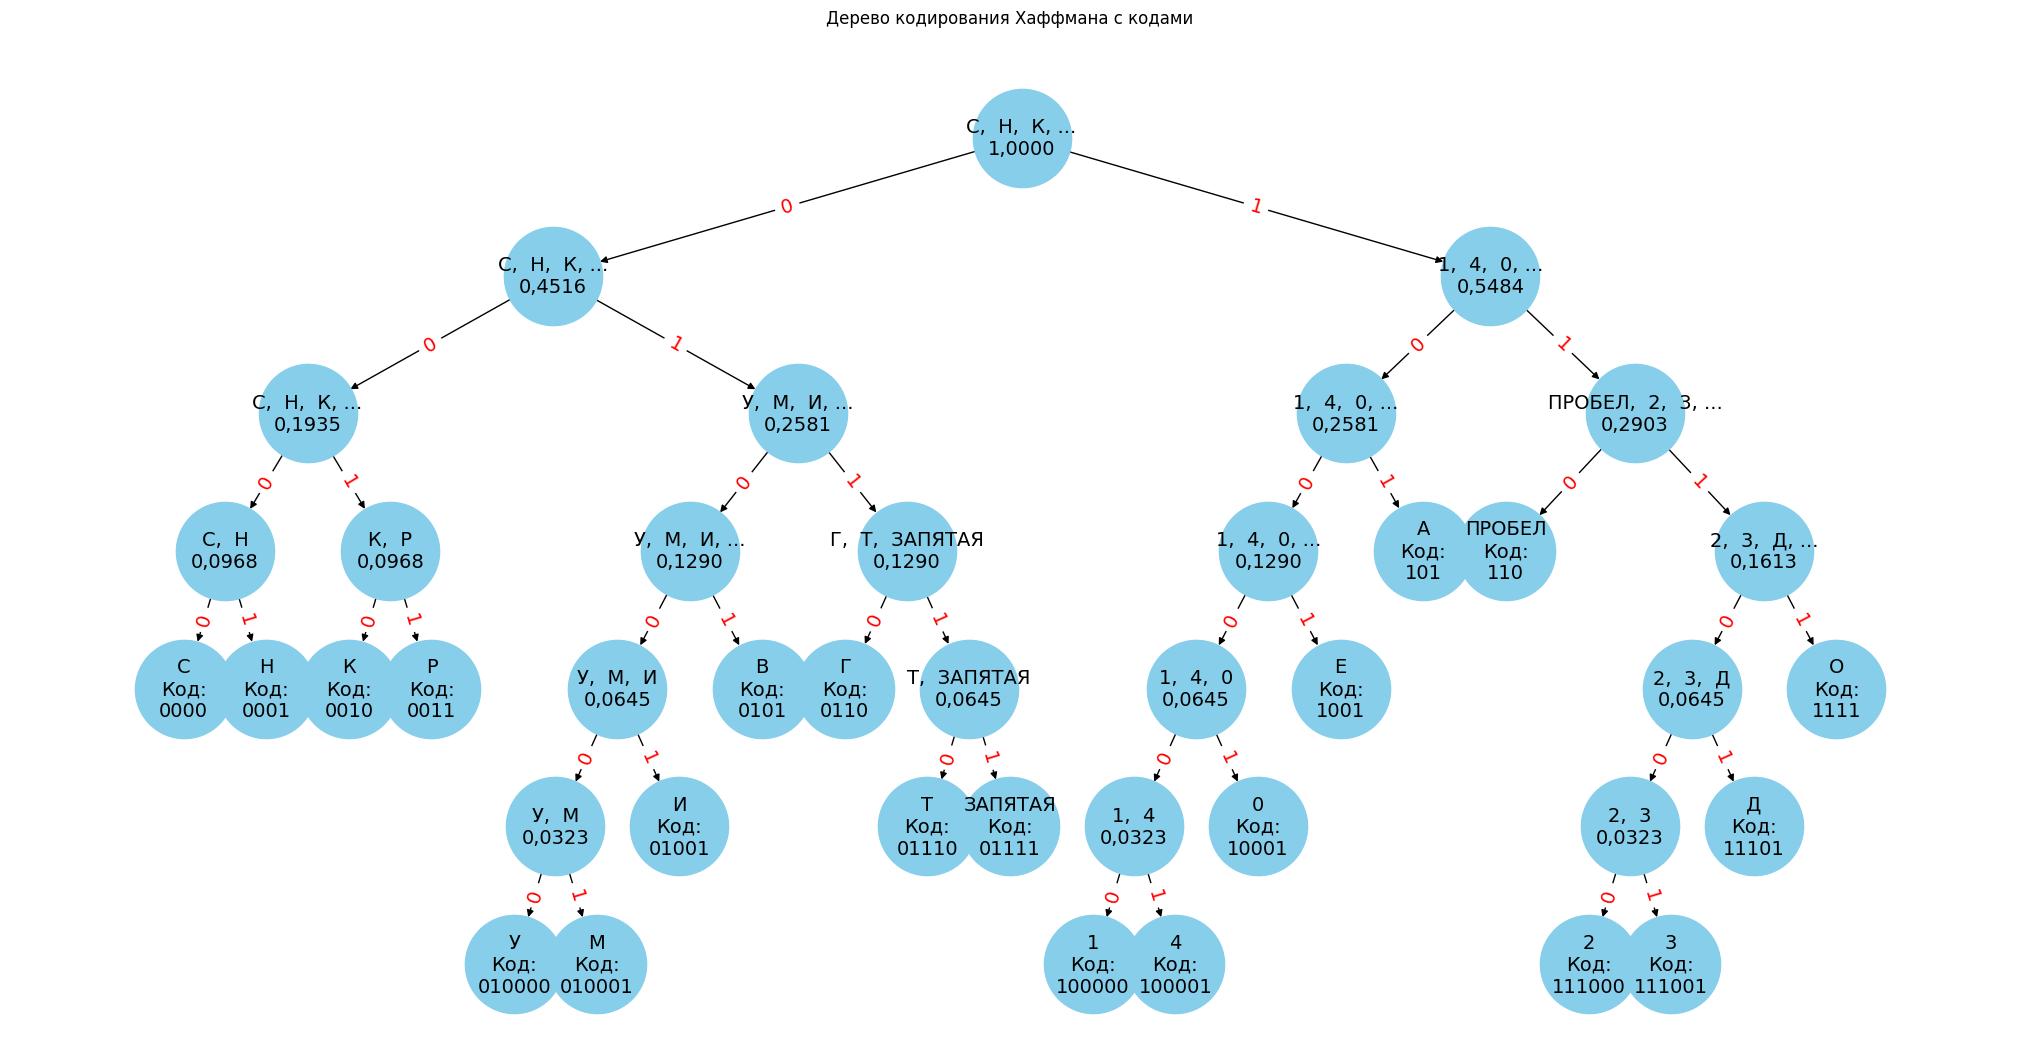

In [210]:
def plot_huffman_tree(tree):
    import matplotlib.pyplot as plt
    import networkx as nx

    G = nx.DiGraph()
    pos = {}
    labels = {}

    leaf_x = 0

    def format_symbols(symbols):
        if len(symbols) <= 3:
            return ', '.join(symbols)
        return ', '.join(symbols[:3]) + ', ...'

    def traverse(node, depth=0):
        nonlocal leaf_x
        if node is None:
            return None

        node_id = id(node)

        if node.left is None and node.right is None:
            # Это лист — дать ему уникальную x позицию
            pos[node_id] = (leaf_x, -depth)
            leaf_x += 1
        else:
            # Рекурсивно получить позиции детей
            left_id = traverse(node.left, depth + 1)
            right_id = traverse(node.right, depth + 1)

            # Центрировать этот узел между детьми
            lx, _ = pos[left_id]
            rx, _ = pos[right_id]
            pos[node_id] = ((lx + rx) / 2, -depth)

            if node.left:
                G.add_edge(node_id, id(node.left), label='0')
            if node.right:
                G.add_edge(node_id, id(node.right), label='1')

        if node.symbol:
            char = 'ПРОБЕЛ' if node.symbol == ' ' else 'ЗАПЯТАЯ' if node.symbol == ',' else node.symbol
            code = codes.get(node.symbol, '')
            labels[node_id] = f"{char}\nКод:\n{code}"
        else:
            symbols = node.name.split(',')
            display_symbols = format_symbols(symbols)
            labels[node_id] = f"{display_symbols}\n{node.freq_str}"

        return node_id

    traverse(tree)

    plt.figure(figsize=(20, 10))
    nx.draw(G, pos, labels=labels, with_labels=True,
            node_size=5000, node_color='skyblue', font_size=14, arrows=True)
    edge_labels = nx.get_edge_attributes(G, 'label')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', font_size=14)
    plt.title("Дерево кодирования Хаффмана с кодами", pad=20)
    plt.axis('off')
    plt.show()

print("\nГрафическое представление дерева Хаффмана:")
plot_huffman_tree(huffman_tree)

### 5. Закодированная строка

In [211]:
code_table

[['С', '0000', 3, '0,0484'],
 ['А', '101', 8, '0,1290'],
 ['В', '0101', 4, '0,0645'],
 ['Е', '1001', 4, '0,0645'],
 ['Н', '0001', 3, '0,0484'],
 ['К', '0010', 3, '0,0484'],
 ['О', '1111', 6, '0,0968'],
 ['ПРОБЕЛ', '110', 8, '0,1290'],
 ['Т', '01110', 2, '0,0323'],
 ['Р', '0011', 3, '0,0484'],
 ['И', '01001', 2, '0,0323'],
 ['Г', '0110', 4, '0,0645'],
 ['ЗАПЯТАЯ', '01111', 2, '0,0323'],
 ['1', '100000', 1, '0,0161'],
 ['4', '100001', 1, '0,0161'],
 ['У', '010000', 1, '0,0161'],
 ['2', '111000', 1, '0,0161'],
 ['0', '10001', 2, '0,0323'],
 ['3', '111001', 1, '0,0161'],
 ['Д', '11101', 2, '0,0323'],
 ['М', '010001', 1, '0,0161']]

In [212]:
print("\nКодирование строки:")
encoded_parts = []
lines = []
for char in origin_string:
    symbol = 'ПРОБЕЛ' if char == ' ' else 'ЗАПЯТАЯ' if char == ',' else char
    code = codes[symbol]
    print(f"{char}: {code}")
    encoded_parts.append(code)

encoded_string = ''.join(encoded_parts)
print("\nЗакодированная строка:")
for i in range(0, len(encoded_string), 100):  # по 100 символов
    print(encoded_string[i:i+100])




Кодирование строки:
С: 0000
А: 101
В: 0101
Е: 1001
Н: 0001
К: 0010
О: 1111
 : 110
Е: 1001
К: 0010
А: 101
Т: 01110
Е: 1001
Р: 0011
И: 01001
Н: 0001
А: 101
 : 110
И: 01001
Г: 0110
О: 1111
Р: 0011
Е: 1001
В: 0101
Н: 0001
А: 101
,: 01111
 : 110
1: 100000
4: 100001
 : 110
А: 101
В: 0101
Г: 0110
У: 010000
С: 0000
Т: 01110
А: 101
 : 110
2: 111000
0: 10001
0: 10001
3: 111001
 : 110
Г: 0110
О: 1111
Д: 11101
А: 101
,: 01111
 : 110
Г: 0110
О: 1111
Р: 0011
О: 1111
Д: 11101
 : 110
М: 010001
О: 1111
С: 0000
К: 0010
В: 0101
А: 101

Закодированная строка:
0000101010110010001001011111101001001010101110100100110100100011011100100101101111001110010101000110
1011111101000001000011101010101011001000000000111010111011100010001100011110011100110111111101101011
111100110111100111111111011100100011111000000100101101


### 5. Степень сжатия

In [ ]:
original_size = len(origin_string) * 8
compressed_size = len(encoded_string)
compression_ratio = (original_size / 8) / ceil(compressed_size / 8)

print(f"\nКоэффициент сжатия: {compression_ratio:.2f}")
print(f"Исходный размер: {original_size} бит = {original_size / 8:.2f} байт")
print(f"Сжатый размер: {compressed_size} бит = {compressed_size / 8:.2f} байт")


Коэффициент сжатия: 1.94
Исходный размер: 496 бит = 62.00 байт
Сжатый размер: 254 бит = 31.75 байт
